In [39]:
import pandas as pd

In [40]:
dataset=pd.read_csv("news_data.csv")

dataset

,docno,doclen,text
0,LA071790-0001,318,for prefer skip museum go directli gift shop n...
1,LA062989-0001,44,express conflict ideolog even contain symbol s...
2,LA062989-0002,51,how inan reason five suprem court justic rule ...
3,LA062989-0003,31,former california chief justic rose bird use m...
4,LA062989-0004,117,angri congressmen vow protect flag headlin art...
...,...,...,...
20567,FT922-1326,106,anglia televis announc costcut measur includ d...
20568,FT922-1327,254,compani are encourag employe travel road rail ...
20569,FT922-1328,64,the shambl built 13th centuri citi butcheri ce...
20570,FT922-1329,115,mr andrew kimmin jail head fail blade group fu...


In [41]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [42]:

count=0
sid = SentimentIntensityAnalyzer()
neg_results=[]
pos_results=[]
neu_results=[]
compunds=[]




for i in range(0,len(dataset)):
     #print(dataset.iloc[i]["docno"])
     ss = sid.polarity_scores(dataset.iloc[i]["text"])
     neg_results.append(ss["neg"])
     pos_results.append(ss["pos"])
     neu_results.append(ss["neu"])
     compunds.append(ss["compound"])

dataset["neg"]=neg_results
dataset["pos"]=pos_results


dataset["neu"]=neu_results


dataset["compund"]=compunds


        



    
    

    

In [43]:
dataset["neg"].mean()

0.07018777950612483

In [44]:
dataset["pos"].mean()

0.09528456153995722

In [45]:
dataset["neu"].mean()

0.834526346490375

In [46]:
dataset["compund"].mean()

0.29868879058915027

In [47]:
dataset

,docno,doclen,text,neg,pos,neu,compund
0,LA071790-0001,318,for prefer skip museum go directli gift shop n...,0.035,0.099,0.866,0.9638
1,LA062989-0001,44,express conflict ideolog even contain symbol s...,0.045,0.214,0.741,0.8271
2,LA062989-0002,51,how inan reason five suprem court justic rule ...,0.067,0.146,0.788,0.5574
3,LA062989-0003,31,former california chief justic rose bird use m...,0.163,0.054,0.784,-0.4118
4,LA062989-0004,117,angri congressmen vow protect flag headlin art...,0.017,0.081,0.902,0.7783
...,...,...,...,...,...,...,...
20567,FT922-1326,106,anglia televis announc costcut measur includ d...,0.060,0.111,0.829,0.8689
20568,FT922-1327,254,compani are encourag employe travel road rail ...,0.009,0.039,0.952,0.4310
20569,FT922-1328,64,the shambl built 13th centuri citi butcheri ce...,0.106,0.048,0.846,-0.4767
20570,FT922-1329,115,mr andrew kimmin jail head fail blade group fu...,0.130,0.044,0.827,-0.8761


array([[<AxesSubplot:title={'center':'neu'}>]], dtype=object)

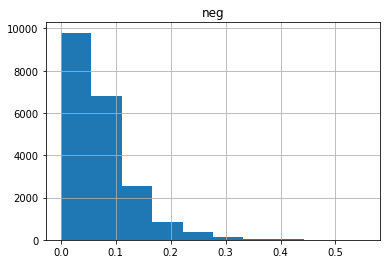

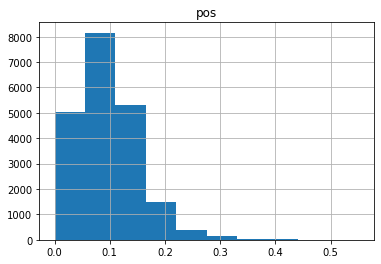

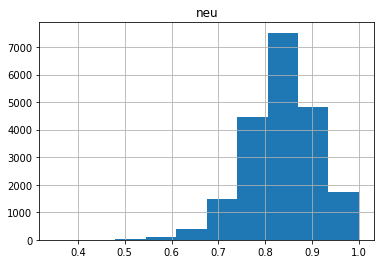

In [48]:
dataset.hist(column="neg")
dataset.hist(column="pos")


dataset.hist(column="neu")



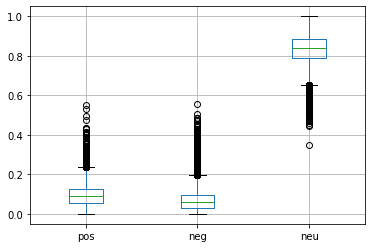

In [49]:
dataset.boxplot(column=['pos','neg','neu'], return_type='axes');


In [50]:
def f(row):
    if row['compund']>=0.5:
        val = 1
    elif row['compund']<=-0.5:
        val = -1
    else:
        val = 0
    return val

In [51]:
dataset['class'] = dataset.apply(f, axis=1)
dataset

,docno,doclen,text,neg,pos,neu,compund,class
0,LA071790-0001,318,for prefer skip museum go directli gift shop n...,0.035,0.099,0.866,0.9638,1
1,LA062989-0001,44,express conflict ideolog even contain symbol s...,0.045,0.214,0.741,0.8271,1
2,LA062989-0002,51,how inan reason five suprem court justic rule ...,0.067,0.146,0.788,0.5574,1
3,LA062989-0003,31,former california chief justic rose bird use m...,0.163,0.054,0.784,-0.4118,0
4,LA062989-0004,117,angri congressmen vow protect flag headlin art...,0.017,0.081,0.902,0.7783,1
...,...,...,...,...,...,...,...,...
20567,FT922-1326,106,anglia televis announc costcut measur includ d...,0.060,0.111,0.829,0.8689,1
20568,FT922-1327,254,compani are encourag employe travel road rail ...,0.009,0.039,0.952,0.4310,0
20569,FT922-1328,64,the shambl built 13th centuri citi butcheri ce...,0.106,0.048,0.846,-0.4767,0
20570,FT922-1329,115,mr andrew kimmin jail head fail blade group fu...,0.130,0.044,0.827,-0.8761,-1


array([[<AxesSubplot:title={'center':'class'}>]], dtype=object)

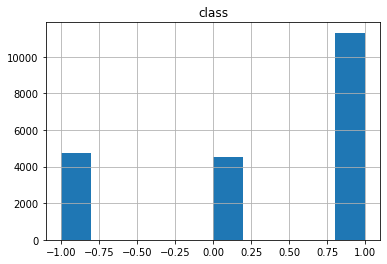

In [52]:
dataset.hist(column="class")

In [53]:
pos_docs=dataset[dataset['class']==1]
pos_docs

,docno,doclen,text,neg,pos,neu,compund,class
0,LA071790-0001,318,for prefer skip museum go directli gift shop n...,0.035,0.099,0.866,0.9638,1
1,LA062989-0001,44,express conflict ideolog even contain symbol s...,0.045,0.214,0.741,0.8271,1
2,LA062989-0002,51,how inan reason five suprem court justic rule ...,0.067,0.146,0.788,0.5574,1
4,LA062989-0004,117,angri congressmen vow protect flag headlin art...,0.017,0.081,0.902,0.7783,1
7,LA062989-0007,219,the suprem court decis support freedom express...,0.111,0.166,0.723,0.9478,1
...,...,...,...,...,...,...,...,...
20560,FT922-1319,122,doctor spend two three hour day walk around ho...,0.016,0.066,0.918,0.7430,1
20562,FT922-1321,541,the british consum chasten debt fear rise unem...,0.083,0.133,0.784,0.9887,1
20564,FT922-1323,118,a pound 70m road tunnel built ukdutch joint ve...,0.014,0.089,0.897,0.8555,1
20567,FT922-1326,106,anglia televis announc costcut measur includ d...,0.060,0.111,0.829,0.8689,1


In [54]:
neg_docs=dataset[dataset['class']==-1]
neg_docs

,docno,doclen,text,neg,pos,neu,compund,class
5,LA062989-0005,17,how difficult inspiringli pain bleed die old g...,0.406,0.092,0.502,-0.8176,-1
9,LA062989-0009,506,the state air resourc board last week delay fa...,0.124,0.092,0.784,-0.9022,-1
10,LA062989-0010,434,the bush administr struck faustian bargain mem...,0.081,0.067,0.851,-0.8225,-1
15,LA090890-0002,141,i read interest john balzer articl mideast cri...,0.205,0.086,0.709,-0.9766,-1
16,LA090890-0003,125,your editori aug 26 describ scholast aptitud t...,0.189,0.074,0.736,-0.9349,-1
...,...,...,...,...,...,...,...,...
20551,FT922-1310,181,citizen advic bureaux press govern tighter rul...,0.142,0.077,0.782,-0.8481,-1
20555,FT922-1314,207,radic chang legal aid need control continu ris...,0.091,0.069,0.840,-0.8360,-1
20559,FT922-1318,156,the number case claim equal pay equal valu bro...,0.075,0.008,0.916,-0.7003,-1
20561,FT922-1320,270,harri pianist tickl ivori attempt lull shopper...,0.115,0.079,0.806,-0.8720,-1


In [55]:
neu_docs=dataset[dataset['class']==0]
neu_docs

,docno,doclen,text,neg,pos,neu,compund,class
3,LA062989-0003,31,former california chief justic rose bird use m...,0.163,0.054,0.784,-0.4118,0
6,LA062989-0006,43,not long ago larri flynt publish hustler magaz...,0.000,0.000,1.000,0.0000,0
8,LA062989-0008,46,the suprem court 54 decis support right burn c...,0.060,0.133,0.808,0.4215,0
23,LA090890-0010,63,i dont know bret johnson i know quarterback ki...,0.000,0.027,0.973,0.1655,0
25,LA090890-0012,49,again year usc public depart done hollywood jo...,0.066,0.054,0.880,-0.1531,0
...,...,...,...,...,...,...,...,...
20563,FT922-1322,396,the sharp declin last month britain visibl tra...,0.046,0.053,0.901,0.4215,0
20565,FT922-1324,79,the scottish deep mine industri wither privati...,0.036,0.052,0.912,0.0772,0
20566,FT922-1325,93,the battl surviv uk two naval dockyard took ne...,0.022,0.014,0.964,-0.2023,0
20568,FT922-1327,254,compani are encourag employe travel road rail ...,0.009,0.039,0.952,0.4310,0


In [74]:
from collections import Counter
pos_count=pd.DataFrame(Counter(" ".join(pos_docs["text"]).split()).most_common(100),columns=['word','count'])
pos_count
Counter(" ".join(pos_docs["text"]).split()).most_common(100)

[('the', 46449),
 ('said', 26727),
 ('year', 21996),
 ('i', 17584),
 ('per', 16134),
 ('mr', 15942),
 ('would', 15528),
 ('cent', 15006),
 ('one', 14705),
 ('pound', 14163),
 ('compani', 13267),
 ('it', 12740),
 ('new', 12641),
 ('market', 10495),
 ('last', 10395),
 ('but', 9882),
 ('time', 9874),
 ('also', 9704),
 ('in', 9529),
 ('bank', 9359),
 ('say', 9352),
 ('two', 9106),
 ('us', 9047),
 ('first', 8957),
 ('like', 8717),
 ('he', 8582),
 ('share', 7748),
 ('make', 7607),
 ('group', 7592),
 ('govern', 7211),
 ('work', 7188),
 ('dollar', 7152),
 ('could', 6922),
 ('a', 6917),
 ('state', 6749),
 ('busi', 6432),
 ('peopl', 6357),
 ('may', 6185),
 ('citi', 6047),
 ('use', 5870),
 ('even', 5820),
 ('take', 5766),
 ('day', 5747),
 ('go', 5720),
 ('price', 5673),
 ('get', 5659),
 ('manag', 5616),
 ('industri', 5565),
 ('rate', 5495),
 ('week', 5470),
 ('mani', 5435),
 ('profit', 5422),
 ('interest', 5273),
 ('includ', 5272),
 ('three', 5246),
 ('play', 5191),
 ('much', 5169),
 ('thi', 5149

In [73]:
neg_count=pd.DataFrame(Counter(" ".join(neg_docs["text"]).split()).most_common(100),columns=['word','count'])
neg_count
Counter(" ".join(neg_docs["text"]).split()).most_common(100)


[('the', 15884),
 ('said', 15486),
 ('year', 6324),
 ('would', 5300),
 ('i', 4937),
 ('one', 4794),
 ('mr', 4690),
 ('it', 3671),
 ('new', 3645),
 ('us', 3585),
 ('last', 3581),
 ('in', 3488),
 ('state', 3471),
 ('two', 3471),
 ('but', 3380),
 ('time', 3209),
 ('govern', 3157),
 ('he', 3072),
 ('peopl', 3017),
 ('also', 3005),
 ('say', 2945),
 ('per', 2919),
 ('cent', 2831),
 ('offici', 2697),
 ('a', 2627),
 ('citi', 2591),
 ('could', 2552),
 ('report', 2491),
 ('first', 2470),
 ('polic', 2429),
 ('offic', 2341),
 ('compani', 2306),
 ('day', 2213),
 ('bank', 2128),
 ('use', 2103),
 ('may', 2089),
 ('week', 2062),
 ('work', 2058),
 ('forc', 2024),
 ('month', 2017),
 ('market', 1988),
 ('nation', 1952),
 ('like', 1950),
 ('make', 1930),
 ('mani', 1903),
 ('dollar', 1890),
 ('even', 1881),
 ('counti', 1865),
 ('go', 1837),
 ('three', 1833),
 ('call', 1831),
 ('pound', 1814),
 ('group', 1776),
 ('war', 1771),
 ('presid', 1706),
 ('take', 1701),
 ('hous', 1694),
 ('san', 1689),
 ('problem',